In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [52]:
raw_data = pd.read_csv("D:/hsb2.csv")
raw_data.head()

,id,Gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [53]:
raw_data.shape  # checking the number of rows and columns

(200, 11)

In [54]:
raw_data.isnull().sum()      # checking for missing values

id         0
Gender     0
race       0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
dtype: int64

In [55]:
df1 = raw_data.iloc[:, -5:]
df1.head(2)

,read,write,math,science,socst
0,57,52,41,47,57
1,68,59,53,63,61


In [56]:
stdz_read    = (df1['read'] - df1['read'].mean() )/ df1['read'].std()
stdz_write   = (df1['write'] - df1['write'].mean() )/ df1['write'].std()
stdz_math    = (df1['math'] - df1['math'].mean() )/ df1['math'].std()
stdz_science = (df1['science'] - df1['science'].mean() )/ df1['science'].std()
stdz_socst   = (df1['socst'] - df1['socst'].mean() )/ df1['socst'].std()

In [57]:
dict = {
    'Student ID' : raw_data['id'],
    'std_read' : stdz_read,
    'std_write' : stdz_write,
    'std_math' : stdz_math,
    'std_science' : stdz_science,
    'std_socst' : stdz_socst
}
df2 = pd.DataFrame(dict)
df2.head(2)

,Student ID,std_read,std_write,std_math,std_science,std_socst
0,70,0.465233,-0.081763,-1.243002,-0.489855,0.428007
1,121,1.538096,0.656744,0.037893,1.126161,0.800593


In [58]:
d = pd.DataFrame(df2.iloc[:, 1:].values)
d

,0,1,2,3,4
0,0.465233,-0.081763,-1.243002,-0.489855,0.428007
1,1.538096,0.656744,0.037893,1.126161,0.800593
2,-0.802697,-2.086282,0.144634,0.621156,-1.993798
3,1.050431,-0.925771,-0.602554,0.116151,0.334861
4,-0.510098,-0.081763,0.464858,0.116151,0.800593
...,...,...,...,...,...
195,0.270166,0.656744,-0.068848,-0.994860,0.334861
196,-0.997763,-0.714769,-1.563226,-1.600866,-0.596602
197,0.465233,-1.242274,0.464858,0.318153,-0.037724
198,0.270166,0.973246,0.571599,0.621156,0.800593


In [59]:
euclidean_dist = pd.DataFrame(squareform(pdist(d, metric='euclidean')))
euclidean_dist 

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,2.467276,3.827631,1.356797,2.091440,2.344641,1.236516,3.177154,2.023103,1.372213,...,2.158941,2.607236,1.663841,2.242406,2.654417,1.491907,2.219857,2.265691,2.411854,3.048334
1,2.467276,0.000000,4.591137,2.095082,2.437808,2.463793,2.341126,4.990537,1.190121,1.982964,...,4.039649,4.044584,2.120681,4.214288,2.663643,2.516878,4.501560,2.509035,1.499230,1.816405
2,3.827631,4.591137,0.000000,3.319163,3.502842,3.490600,4.191776,2.766721,3.649071,3.341217,...,3.217336,3.190791,3.144266,4.312411,4.238974,4.093282,3.424240,2.518049,4.301472,4.926860
3,1.356797,2.095082,3.319163,0.000000,2.122233,2.359186,2.147963,3.682418,1.706246,1.510894,...,2.984094,3.338354,1.664624,3.360488,3.059596,2.152290,2.996378,1.327262,2.462855,2.969342
4,2.091440,2.437808,3.502842,2.122233,0.000000,1.231222,1.787341,3.327330,1.984618,1.515164,...,2.811400,2.748670,0.725000,2.828726,1.514037,1.700088,3.106757,1.744028,1.410064,2.246217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.491907,2.516878,4.093282,2.152290,1.700088,2.534454,1.681796,3.193234,1.878117,1.042075,...,2.284009,2.687565,1.587012,1.968157,1.546474,0.000000,2.637560,2.406654,1.827228,2.094348
196,2.219857,4.501560,3.424240,2.996378,3.106757,3.428282,2.751811,1.458266,3.689574,2.737048,...,1.182811,2.021851,2.850149,1.526620,3.554929,2.637560,0.000000,3.244491,3.987989,4.628121
197,2.265691,2.509035,2.518049,1.327262,1.744028,2.172615,2.716533,3.432753,1.842521,1.652307,...,3.116411,3.303473,1.460831,3.621119,2.803356,2.406654,3.244491,0.000000,2.398450,2.868166
198,2.411854,1.499230,4.301472,2.462855,1.410064,1.754253,1.873448,4.251507,1.391760,1.585597,...,3.419763,3.279101,1.394425,3.409541,1.274498,1.827228,3.987989,2.398450,0.000000,1.233818


In [60]:
# Extract all unique combinations of indices (i, j) where i < j
index_pairs = list(itertools.combinations(range(len(euclidean_dist)), 2))

# Convert combinations to DataFrame
distances = [{"ID Pair": (i, j), "Distance": euclidean_dist.iloc[i, j]} for i, j in index_pairs]
distance_df = pd.DataFrame(distances)

# Find the pair with the smallest distance
min_distance_pair = distance_df.loc[distance_df["Distance"].idxmin()]

# Display all combinations and the smallest one
print(distance_df)  # Displays pairs
print("\nSmallest Distance Pair:\n", min_distance_pair) 

          ID Pair  Distance
0          (0, 1)  2.467276
1          (0, 2)  3.827631
2          (0, 3)  1.356797
3          (0, 4)  2.091440
4          (0, 5)  2.344641
...           ...       ...
19895  (196, 198)  3.987989
19896  (196, 199)  4.628121
19897  (197, 198)  2.398450
19898  (197, 199)  2.868166
19899  (198, 199)  1.233818

[19900 rows x 2 columns]

Smallest Distance Pair:
 ID Pair     (26, 159)
Distance     0.255789
Name: 4981, dtype: object


In [61]:
minkowski_3_dist = pd.DataFrame(squareform(pdist(d, metric='minkowski', p = 3)))
minkowski_3_dist

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,2.000933,3.048840,1.087936,1.835463,1.959738,0.998833,2.697663,1.658883,1.228224,...,1.873856,2.294405,1.433889,1.879792,2.281648,1.292368,1.803373,1.928560,2.047200,2.708387
1,2.000933,0.000000,3.812500,1.762302,2.161829,2.365623,2.004988,4.052225,1.020746,1.636539,...,3.257382,3.441455,1.860714,3.578305,2.265511,2.269058,3.583024,2.101268,1.329672,1.518512
2,3.048840,3.812500,0.000000,2.763305,3.109349,3.108485,3.553996,2.261250,3.074513,2.782570,...,2.648722,2.720981,2.755034,3.516230,3.730629,3.383409,2.770580,2.167614,3.727058,4.089847
3,1.087936,1.762302,2.763305,0.000000,1.788267,2.014413,1.842467,3.172810,1.477721,1.269140,...,2.417480,2.874416,1.427770,2.766022,2.590050,1.813236,2.485707,1.146810,2.093247,2.624072
4,1.835463,2.161829,3.109349,1.788267,0.000000,1.096428,1.654920,2.707538,1.700444,1.248801,...,2.347923,2.288117,0.596413,2.325919,1.399584,1.357611,2.545870,1.456240,1.211763,1.913190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.292368,2.269058,3.383409,1.813236,1.357611,2.242813,1.410222,2.624739,1.688670,0.892583,...,1.869260,2.213446,1.406704,1.637477,1.233958,0.000000,2.079017,2.104689,1.664989,1.695375
196,1.803373,3.583024,2.770580,2.485707,2.545870,2.960237,2.218732,1.200038,2.970405,2.172440,...,0.985675,1.683279,2.333626,1.404054,2.914457,2.079017,0.000000,2.661902,3.116737,3.643663
197,1.928560,2.101268,2.167614,1.146810,1.456240,1.707774,2.281041,2.761871,1.718110,1.518848,...,2.411976,2.654815,1.262175,2.896307,2.590017,2.104689,2.661902,0.000000,2.257215,2.603823
198,2.047200,1.329672,3.727058,2.093247,1.211763,1.435021,1.738889,3.294840,1.146699,1.261721,...,2.682382,2.644064,1.162525,2.827723,1.046175,1.664989,3.116737,2.257215,0.000000,1.017260


In [62]:
# Extract all unique combinations of indices (i, j) where i < j
index_pairs_3 = list(itertools.combinations(range(len(minkowski_3_dist)), 2))

# Convert combinations to DataFrame
distances_3 = [{"ID Pair": (i, j), "Distance": minkowski_3_dist.iloc[i, j]} for i, j in index_pairs_3]
distance_df_3 = pd.DataFrame(distances_3)

# Find the pair with the smallest distance
min_distance_pair_3 = distance_df_3.loc[distance_df_3["Distance"].idxmin()]

# Display all combinations and the smallest one
print(distance_df_3)  # Displays pairs
print("\nSmallest Distance Pair:\n", min_distance_pair_3) 

          ID Pair  Distance
0          (0, 1)  2.000933
1          (0, 2)  3.048840
2          (0, 3)  1.087936
3          (0, 4)  1.835463
4          (0, 5)  1.959738
...           ...       ...
19895  (196, 198)  3.116737
19896  (196, 199)  3.643663
19897  (197, 198)  2.257215
19898  (197, 199)  2.603823
19899  (198, 199)  1.017260

[19900 rows x 2 columns]

Smallest Distance Pair:
 ID Pair     (26, 159)
Distance     0.225967
Name: 4981, dtype: object


In [63]:
minkowski_4_dist = pd.DataFrame(squareform(pdist(d, metric='minkowski', p = 4)))
minkowski_4_dist

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,1.827479,2.763950,0.981467,1.758695,1.809540,0.904389,2.523984,1.533045,1.191677,...,1.759375,2.180793,1.351416,1.746203,2.150051,1.226735,1.648101,1.812606,1.921272,2.616654
1,1.827479,0.000000,3.486000,1.659505,2.086978,2.346609,1.878068,3.707440,0.967577,1.501419,...,2.956513,3.251745,1.790170,3.339327,2.142993,2.186844,3.242776,1.977221,1.286669,1.409740
2,2.763950,3.486000,0.000000,2.566516,2.964202,2.964132,3.312933,2.085151,2.838756,2.576657,...,2.438798,2.594960,2.599694,3.207795,3.556069,3.115107,2.518570,2.052603,3.499376,3.782218
3,0.981467,1.659505,2.566516,0.000000,1.670275,1.914029,1.731304,2.991155,1.410853,1.199148,...,2.221172,2.729802,1.343899,2.532903,2.410111,1.694636,2.298206,1.096662,1.980612,2.479031
4,1.758695,2.086978,2.964202,1.670275,0.000000,1.050154,1.619368,2.496430,1.616976,1.151358,...,2.169031,2.115457,0.546618,2.148331,1.377863,1.234148,2.333243,1.338972,1.137585,1.778302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.226735,2.186844,3.115107,1.694636,1.234148,2.163471,1.307813,2.405839,1.640441,0.843599,...,1.701088,2.040333,1.350490,1.513540,1.104682,0.000000,1.861114,2.002471,1.629202,1.552515
196,1.648101,3.242776,2.518570,2.298206,2.333243,2.817143,2.013755,1.096118,2.689794,1.948878,...,0.914649,1.565680,2.151262,1.379394,2.677080,1.861114,0.000000,2.436384,2.779240,3.276402
197,1.812606,1.977221,2.052603,1.096662,1.338972,1.530483,2.122366,2.512440,1.695056,1.488232,...,2.133045,2.405037,1.201445,2.600691,2.547281,2.002471,2.436384,0.000000,2.227015,2.549469
198,1.921272,1.286669,3.499376,1.980612,1.137585,1.309497,1.714428,2.916913,1.053990,1.132709,...,2.393118,2.394028,1.093928,2.622123,0.961892,1.629202,2.779240,2.227015,0.000000,0.932897


In [64]:
# Extract all unique combinations of indices (i, j) where i < j
index_pairs_4 = list(itertools.combinations(range(len(minkowski_4_dist)), 2))

# Convert combinations to DataFrame
distances_4 = [{"ID Pair": (i, j), "Distance": minkowski_4_dist.iloc[i, j]} for i, j in index_pairs_4]
distance_df_4 = pd.DataFrame(distances_4)

# Find the pair with the smallest distance
min_distance_pair_4 = distance_df_4.loc[distance_df_4["Distance"].idxmin()]

# Display all combinations and the smallest one
print(distance_df_4)  # Displays pairs
print("\nSmallest Distance Pair:\n", min_distance_pair_4) 

          ID Pair  Distance
0          (0, 1)  1.827479
1          (0, 2)  2.763950
2          (0, 3)  0.981467
3          (0, 4)  1.758695
4          (0, 5)  1.809540
...           ...       ...
19895  (196, 198)  2.779240
19896  (196, 199)  3.276402
19897  (197, 198)  2.227015
19898  (197, 199)  2.549469
19899  (198, 199)  0.932897

[19900 rows x 2 columns]

Smallest Distance Pair:
 ID Pair     (26, 159)
Distance     0.216635
Name: 4981, dtype: object


In [65]:
cityblock_dist = pd.DataFrame(squareform(pdist(d, metric='cityblock')))
cityblock_dist

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,5.080867,8.192901,2.768806,3.661782,4.323944,2.506571,6.067312,4.170229,2.352538,...,3.669344,4.475784,2.864781,4.277668,4.771076,2.705878,4.551846,4.142111,4.548274,5.497093
1,5.080867,0.000000,8.489955,4.186369,4.223676,3.292782,3.939759,10.294249,2.241877,3.846085,...,8.328207,7.682153,3.767841,7.668039,5.207133,3.961424,9.632713,5.045171,2.623144,3.411576
2,8.192901,8.489955,0.000000,6.594491,5.916737,5.624138,7.908514,5.692265,6.248078,6.473368,...,6.345703,6.332654,5.328120,8.603471,7.445745,7.974046,6.893657,4.691237,7.353747,9.702708
3,2.768806,4.186369,6.594491,0.000000,3.937681,4.599842,3.849882,6.529884,3.089438,3.048150,...,6.251857,6.238809,2.954387,6.646699,5.466688,4.007496,5.868348,2.543701,4.824172,4.602595
4,3.661782,4.223676,5.916737,3.937681,0.000000,1.943057,2.632225,6.924503,3.844726,3.060006,...,5.380466,5.367417,1.387298,5.775307,2.460471,3.629220,6.262968,3.176160,2.447020,3.785971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.705878,3.961424,7.974046,4.007496,3.629220,4.504864,3.131821,6.332825,3.286497,1.890810,...,4.366783,5.336746,2.645926,3.706615,3.075208,0.000000,5.671289,4.313388,3.038698,4.377649
196,4.551846,9.632713,6.893657,5.868348,6.262968,6.339931,5.692954,2.761920,7.604319,5.786628,...,2.235969,4.052420,5.864872,2.563744,7.185969,5.671289,0.000000,6.496482,8.709988,10.048939
197,4.142111,5.045171,4.691237,2.543701,3.176160,4.715213,5.223187,7.158018,2.989587,2.608871,...,6.879991,6.866943,2.642792,7.274833,4.705168,4.313388,6.496482,0.000000,3.658648,5.011471
198,4.548274,2.623144,7.353747,4.824172,2.447020,3.380067,3.017033,9.371524,2.666198,3.313492,...,7.405482,6.759428,2.845116,6.745313,2.583990,3.038698,8.709988,3.658648,0.000000,2.348961


In [66]:
# Extract all unique combinations of indices (i, j) where i < j
index_pairs_CB = list(itertools.combinations(range(len(cityblock_dist)), 2))

# Convert combinations to DataFrame
distances_CB = [{"ID Pair": (i, j), "Distance": cityblock_dist.iloc[i, j]} for i, j in index_pairs_CB]
distance_df_CB = pd.DataFrame(distances_CB)

# Find the pair with the smallest distance
min_distance_pair_CB = distance_df_CB.loc[distance_df_CB["Distance"].idxmin()]

# Display all combinations and the smallest one
print(distance_df_CB)  # Displays pairs
print("\nSmallest Distance Pair:\n", min_distance_pair_CB) 

          ID Pair   Distance
0          (0, 1)   5.080867
1          (0, 2)   8.192901
2          (0, 3)   2.768806
3          (0, 4)   3.661782
4          (0, 5)   4.323944
...           ...        ...
19895  (196, 198)   8.709988
19896  (196, 199)  10.048939
19897  (197, 198)   3.658648
19898  (197, 199)   5.011471
19899  (198, 199)   2.348961

[19900 rows x 2 columns]

Smallest Distance Pair:
 ID Pair     (127, 177)
Distance      0.408504
Name: 17321, dtype: object


In [67]:
np.random.seed(42)  # For reproducibility
d = np.random.rand(200, 5)  # Simulating 200 students with 5 feature attributes

# Sample section mapping (Assigning random sections: A, B, C)
sections = {i: np.random.choice(['A', 'B', 'C']) for i in range(len(d))}

In [68]:
# Creating a distance Matrix DataFrame from a Dictionary
dist_matrix = {
    "ID Pair" : distance_df["ID Pair"],
    "Student 1": [i for i, j in distance_df["ID Pair"]],
    "Student 2": [j for i, j in distance_df["ID Pair"]],
    "Section 1": [sections[i] for i, j in distance_df["ID Pair"]],
    "Section 2": [sections[j] for i, j in distance_df["ID Pair"]],
    "Euclidean" : distance_df["Distance"],
    "Minkowiski (p=3)" : distance_df_3["Distance"],
    "Minkowiski (p=4)" : distance_df_4["Distance"],
    "Manhattan/Cityblock" : distance_df_CB["Distance"]
                            }
data = pd.DataFrame(dist_matrix)
data

,ID Pair,Student 1,Student 2,Section 1,Section 2,Euclidean,Minkowiski (p=3),Minkowiski (p=4),Manhattan/Cityblock
0,"(0, 1)",0,1,C,B,2.467276,2.000933,1.827479,5.080867
1,"(0, 2)",0,2,C,C,3.827631,3.048840,2.763950,8.192901
2,"(0, 3)",0,3,C,C,1.356797,1.087936,0.981467,2.768806
3,"(0, 4)",0,4,C,A,2.091440,1.835463,1.758695,3.661782
4,"(0, 5)",0,5,C,A,2.344641,1.959738,1.809540,4.323944
...,...,...,...,...,...,...,...,...,...
19895,"(196, 198)",196,198,C,A,3.987989,3.116737,2.779240,8.709988
19896,"(196, 199)",196,199,C,C,4.628121,3.643663,3.276402,10.048939
19897,"(197, 198)",197,198,A,A,2.398450,2.257215,2.227015,3.658648
19898,"(197, 199)",197,199,A,C,2.868166,2.603823,2.549469,5.011471


In [69]:
# Define Distance Columns
distance_columns = ["Euclidean", "Minkowiski (p=3)", "Minkowiski (p=4)", "Manhattan/Cityblock"]

# Find Minimum Distance for Each Row
data["Min_Distance"] = data[distance_columns].min(axis=1)

# Find Which Distance Metric is the Minimum
data["Min_Distance_Type"] = data[distance_columns].idxmin(axis=1)

# Display Results
print(data[["ID Pair", "Student 1", "Student 2", "Min_Distance", "Min_Distance_Type"]].head())

  ID Pair  Student 1  Student 2  Min_Distance Min_Distance_Type
0  (0, 1)          0          1      1.827479  Minkowiski (p=4)
1  (0, 2)          0          2      2.763950  Minkowiski (p=4)
2  (0, 3)          0          3      0.981467  Minkowiski (p=4)
3  (0, 4)          0          4      1.758695  Minkowiski (p=4)
4  (0, 5)          0          5      1.809540  Minkowiski (p=4)


In [70]:
data

,ID Pair,Student 1,Student 2,Section 1,Section 2,Euclidean,Minkowiski (p=3),Minkowiski (p=4),Manhattan/Cityblock,Min_Distance,Min_Distance_Type
0,"(0, 1)",0,1,C,B,2.467276,2.000933,1.827479,5.080867,1.827479,Minkowiski (p=4)
1,"(0, 2)",0,2,C,C,3.827631,3.048840,2.763950,8.192901,2.763950,Minkowiski (p=4)
2,"(0, 3)",0,3,C,C,1.356797,1.087936,0.981467,2.768806,0.981467,Minkowiski (p=4)
3,"(0, 4)",0,4,C,A,2.091440,1.835463,1.758695,3.661782,1.758695,Minkowiski (p=4)
4,"(0, 5)",0,5,C,A,2.344641,1.959738,1.809540,4.323944,1.809540,Minkowiski (p=4)
...,...,...,...,...,...,...,...,...,...,...,...
19895,"(196, 198)",196,198,C,A,3.987989,3.116737,2.779240,8.709988,2.779240,Minkowiski (p=4)
19896,"(196, 199)",196,199,C,C,4.628121,3.643663,3.276402,10.048939,3.276402,Minkowiski (p=4)
19897,"(197, 198)",197,198,A,A,2.398450,2.257215,2.227015,3.658648,2.227015,Minkowiski (p=4)
19898,"(197, 199)",197,199,A,C,2.868166,2.603823,2.549469,5.011471,2.549469,Minkowiski (p=4)


In [71]:
# Extract student IDs and their sections
student_sections = pd.concat([
    data[['Student 1', 'Section 1', 'Min_Distance', 'Min_Distance_Type']],
    data[['Student 2', 'Section 2', 'Min_Distance', 'Min_Distance_Type']].rename(columns={'Student 2': 'Student 1', 'Section 2': 'Section 1'})
], ignore_index=True)

In [72]:
# Remove duplicates and keep only the minimum distance per student
student_sections = student_sections.groupby('Student 1', as_index=False).agg({'Section 1': 'first', 'Min_Distance': 'min', 'Min_Distance_Type': 'first'})

# Ensure student IDs remain 1-200
student_sections = student_sections[student_sections['Student 1'].between(1, 200)].sort_values(by='Student 1').reset_index(drop=True)
student_sections

,Student 1,Section 1,Min_Distance,Min_Distance_Type
0,1,B,0.489820,Minkowiski (p=4)
1,2,C,1.319005,Minkowiski (p=4)
2,3,C,0.547103,Minkowiski (p=4)
3,4,A,0.546618,Minkowiski (p=4)
4,5,A,0.792446,Minkowiski (p=4)
...,...,...,...,...
194,195,A,0.740678,Minkowiski (p=4)
195,196,C,0.268856,Minkowiski (p=4)
196,197,A,0.566036,Minkowiski (p=4)
197,198,A,0.474220,Minkowiski (p=4)


In [73]:
# Extract unique student IDs
students = np.unique(data[['Student 1', 'Student 2']].values)
students

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

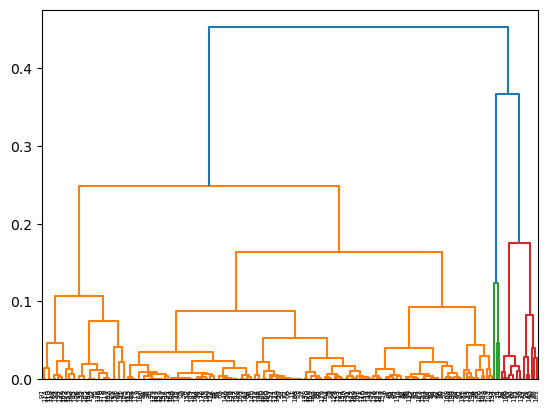

In [74]:
avc_link = linkage(student_sections[['Min_Distance']].fillna(0), method='average')
dend = dendrogram(avc_link)

In [75]:
# Perform hierarchical clustering
clusters = fcluster(avc_link, 3, criterion="maxclust")
student_sections["clusters"] = clusters
student_sections

,Student 1,Section 1,Min_Distance,Min_Distance_Type,clusters
0,1,B,0.489820,Minkowiski (p=4),1
1,2,C,1.319005,Minkowiski (p=4),2
2,3,C,0.547103,Minkowiski (p=4),1
3,4,A,0.546618,Minkowiski (p=4),1
4,5,A,0.792446,Minkowiski (p=4),1
...,...,...,...,...,...
194,195,A,0.740678,Minkowiski (p=4),1
195,196,C,0.268856,Minkowiski (p=4),1
196,197,A,0.566036,Minkowiski (p=4),1
197,198,A,0.474220,Minkowiski (p=4),1


In [76]:
student_sections.head()

,Student 1,Section 1,Min_Distance,Min_Distance_Type,clusters
0,1,B,0.489820,Minkowiski (p=4),1
1,2,C,1.319005,Minkowiski (p=4),2
2,3,C,0.547103,Minkowiski (p=4),1
3,4,A,0.546618,Minkowiski (p=4),1
4,5,A,0.792446,Minkowiski (p=4),1


In [77]:
# Create a DataFrame for each student with their assign section
student_dataframe = student_sections[['Student 1', 'Section 1']]
student_dataframe

,Student 1,Section 1
0,1,B
1,2,C
2,3,C
3,4,A
4,5,A
...,...,...
194,195,A
195,196,C
196,197,A
197,198,A


In [78]:
freq_table=pd.crosstab(student_sections['Section 1'],'count')
freq_table

col_0,count
Section 1,
A,71
B,63
C,65


# Finish

In [79]:
# Creating a distance Matrix DataFrame from a Dictionary
dist_matric = {
    "Student ID" : student_sections["Student 1"],
    "Min_distance" : student_sections["Min_Distance"],
    "Clusters" : student_sections["clusters"]
                            }
df4 = pd.DataFrame(dist_matric)
df4

,Student ID,Min_distance,Clusters
0,1,0.489820,1
1,2,1.319005,2
2,3,0.547103,1
3,4,0.546618,1
4,5,0.792446,1
...,...,...,...
194,195,0.740678,1
195,196,0.268856,1
196,197,0.566036,1
197,198,0.474220,1


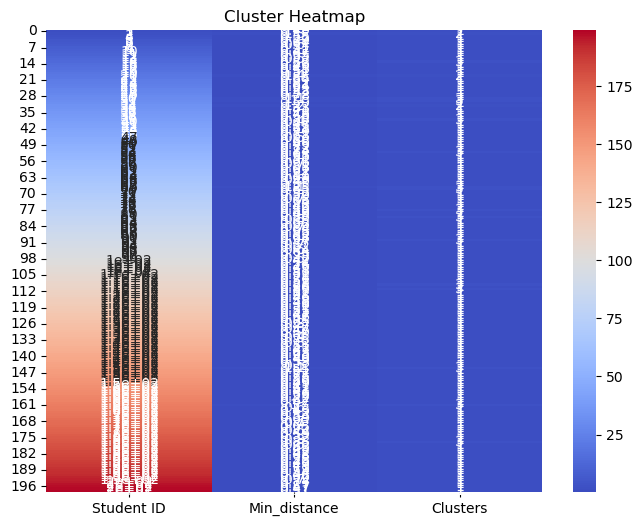

In [80]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df4, annot=True, cmap='coolwarm')
plt.title('Cluster Heatmap')
plt.show()